# Bag Of Words NLP Model

## Importing libraries

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import string
from wordcloud import WordCloud

## Loading the DataSet

In [341]:
# using pandas library to load the csv file
#ISO 8859-1 is a single-byte encoding that can represent the first 256 Unicode characters.
df = pd.read_csv("spam.csv",encoding='ISO-8859-1', usecols=['v1','v2'])

In [342]:
#Plotting the first 10 rows of the DataSet
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Exploring the Data

#### Rename the columns to labels and messages

In [343]:
df.columns = ["labels","messages"]

In [344]:
df.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Displaying number of rows and columns 

In [345]:
print(df.shape)

(5572, 2)


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [347]:
# the columns are object type
df.dtypes

labels      object
messages    object
dtype: object

## Data Preprocessing

#### Check for Null values

In [348]:
print(df.isnull().values.any())

False


In [349]:
# Drop any null values if they exist 
df.dropna(axis= 0 ,inplace=True)

In [350]:
# displaying the new shape of df
print(df.shape)

(5572, 2)


#### Removing duplicate rows from 'labels' & 'messages'

In [351]:
df.drop_duplicates(subset=['labels','messages'], keep='first', inplace=True)

In [352]:
df.head(10)

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [353]:
print(df.shape)

(5169, 2)


### Exploratory Data Analysis (EDA)

#### Analysing Data using Visualisation plots (graphs)

##### Disposition of spam  & ham in labels column

In [354]:
# Total number of 'ham' and 'spam' messages in 'labels' column
df['labels'].value_counts()

ham     4516
spam     653
Name: labels, dtype: int64

#### Count plot using bars

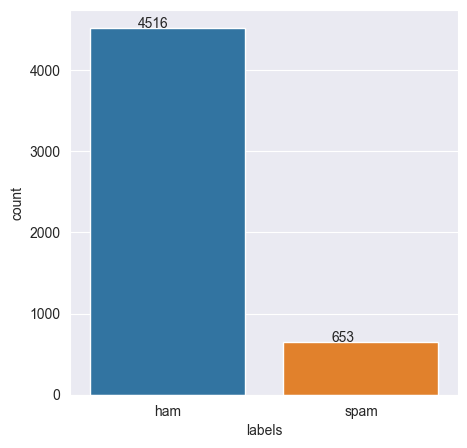

In [355]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df["labels"], data=df)
for p, label in zip(ax.patches, df["labels"].value_counts()):
    ax.annotate(label, (p.get_x() + 0.25, p.get_height() + 0.5))
plt.show()

#### Count using percentage values 

In [356]:
# number pf 'ham and 'spam' in labels in percentage
df['labels'].value_counts(normalize=True)*100

ham     87.366996
spam    12.633004
Name: labels, dtype: float64

#### Count plot using pie char chart

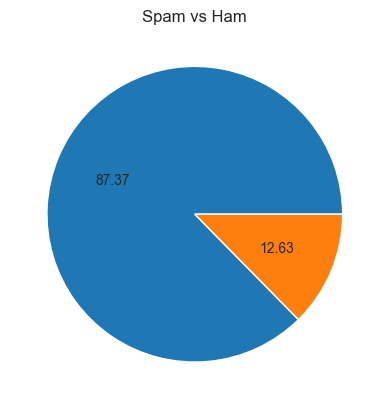

In [357]:
plt.pie(x=df['labels'].value_counts(),autopct='%.2f')
plt.title('Spam vs Ham')
plt.show()

## Text Cleaning

#### Importing the libraries for text preprocessing

In [358]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [359]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

#### Lowering the text

In [360]:
df["messages"] = df["messages"].str.lower()

In [361]:
df["messages"]

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: messages, Length: 5169, dtype: object

#### Removing the special characters

In [362]:
df["messages"] = df["messages"].apply(lambda x: re.sub(r'[^\w\s]', '',x))

In [363]:
df["messages"]

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ì_ b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: messages, Length: 5169, dtype: object

#### Tokenizing the text

In [364]:
df["messages"] = df["messages"].apply(word_tokenize)

In [365]:
df["messages"]

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568        [will, ì_, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, soany, other,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: messages, Length: 5169, dtype: object

#### Deploying Stopwords

In [366]:
stop_words = set(stopwords.words("english"))

In [367]:
df["messages"] = df["messages"].apply(lambda x: [word for word in x if word not in stop_words])

In [368]:
df["messages"]

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å750, pou...
5568                  [ì_, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: messages, Length: 5169, dtype: object

#### Stemming algorithm

In [369]:
# loading the stemming model 
ps = PorterStemmer()

In [370]:
# preparing the model to be applyed on df['messages']
df["messages"] = df["messages"].apply(lambda x: [ps.stem(word) for word in x])

In [371]:
# applying the model on df['messages']
df["messages"] = df["messages"].apply(lambda x: " ".join(x))

In [372]:
# displaying df['messages'] after stemming 
df["messages"]

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å750 pound prize 2 ...
5568                             ì_ b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: messages, Length: 5169, dtype: object

In [373]:
# tokenize the text data in the "messages" column
tokenized_text = nltk.word_tokenize(df["messages"].str.cat(sep=" "))

In [374]:
# prints tokenized text
tokenized_text

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'questionstd',
 'txt',
 'ratetc',
 'appli',
 '08452810075over18',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'dont',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å150',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'winner',
 'valu',
 'network',
 '

In [375]:
# calculate the frequency distribution of tokens in the tokenized_text list
fdist = nltk.FreqDist(tokenized_text)

In [376]:
fdist

FreqDist({'u': 1001, 'call': 553, 'im': 448, '2': 443, 'go': 434, 'get': 425, 'ur': 316, 'come': 277, 'dont': 258, '4': 257, ...})

In [377]:
# prints the most tokens with high values
print(fdist.most_common(10))

[('u', 1001), ('call', 553), ('im', 448), ('2', 443), ('go', 434), ('get', 425), ('ur', 316), ('come', 277), ('dont', 258), ('4', 257)]


### Plot of tokens frequency

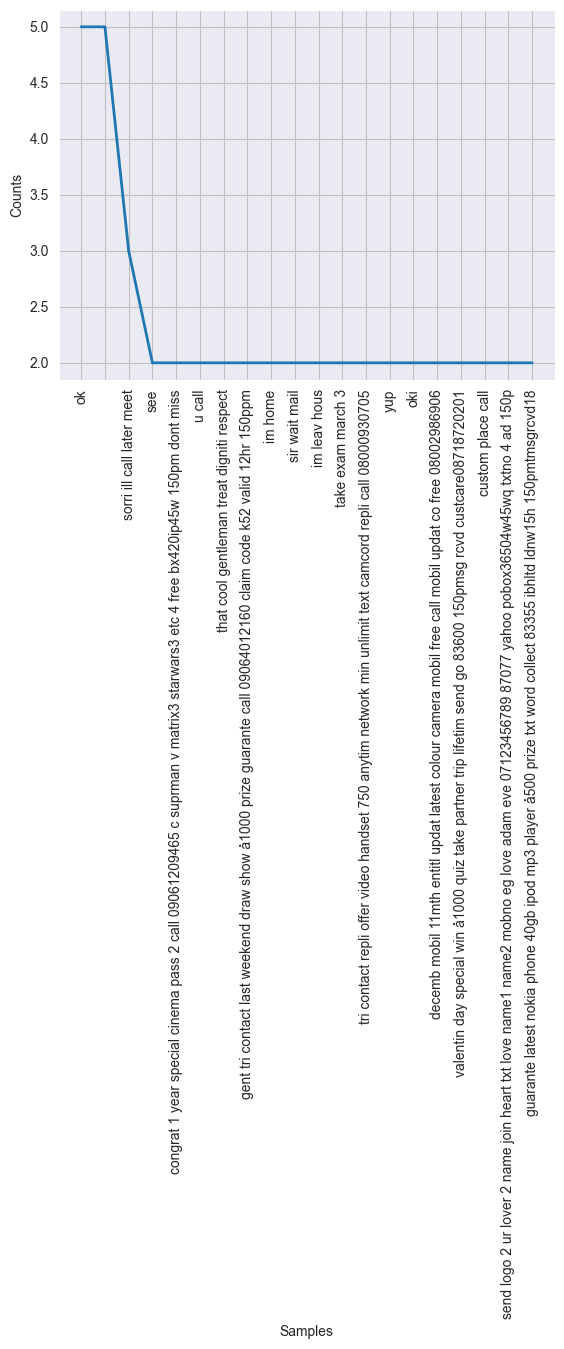

<Axes: xlabel='Samples', ylabel='Counts'>

In [378]:
sns.set_style('darkgrid')
nlp_words = nltk.FreqDist(df["messages"])
nlp_words.plot(20, cumulative=False)

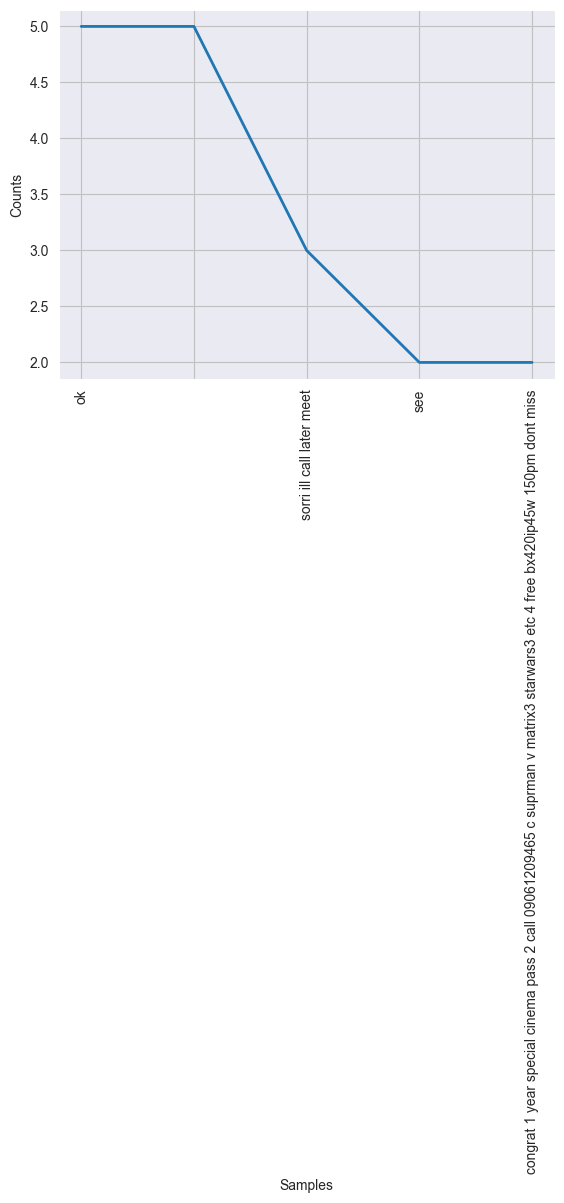

<Axes: xlabel='Samples', ylabel='Counts'>

In [379]:
nlp_words.plot(5)

# Bag Of Words Deploying

## Method 1 : Using N-grams & Countvectorizer

#### Importing libraires for corpus 

In [380]:
from nltk.corpus import stopwords
from nltk import punkt
from collections import Counter

### Unigrams count (individual tokens)

In [381]:
tokenized_text = nltk.word_tokenize(" ".join(df["messages"].values.tolist()))
unigram_counts = Counter(tokenized_text)
top_unigrams = unigram_counts.most_common(10)

In [382]:
top_unigrams 

[('u', 1001),
 ('call', 553),
 ('im', 448),
 ('2', 443),
 ('go', 434),
 ('get', 425),
 ('ur', 316),
 ('come', 277),
 ('dont', 258),
 ('4', 257)]

In [383]:
# retreive values of unigrams from 'messages' and converts them to list
unigrams_fd = nltk.FreqDist(nltk.word_tokenize(" ".join(df["messages"].tolist())))

In [384]:
unigrams_fd

FreqDist({'u': 1001, 'call': 553, 'im': 448, '2': 443, 'go': 434, 'get': 425, 'ur': 316, 'come': 277, 'dont': 258, '4': 257, ...})

### Bigrams count

In [385]:
# retreive values of bigrams from 'messages' and converts them to list
bigrams_fd = nltk.FreqDist(nltk.bigrams(nltk.word_tokenize((" ".join(df["messages"].tolist())))))

In [386]:
bigrams_fd

FreqDist({('gon', 'na'): 58, ('pleas', 'call'): 44, ('let', 'know'): 41, ('wan', 'na'): 38, ('r', 'u'): 38, ('u', 'r'): 34, ('dont', 'know'): 32, ('wan', '2'): 31, ('new', 'year'): 30, ('u', 'wan'): 30, ...})

### Trigrams count

In [387]:
trigrams_fd = nltk.FreqDist(nltk.trigrams(nltk.word_tokenize((" ".join(df["messages"].tolist())))))

In [388]:
trigrams_fd

FreqDist({('u', 'wan', '2'): 21, ('im', 'gon', 'na'): 20, ('prize', 'guarante', 'call'): 19, ('happi', 'new', 'year'): 17, ('repli', 'call', '08000930705'): 14, ('privat', '2003', 'account'): 13, ('2003', 'account', 'statement'): 13, ('call', 'custom', 'servic'): 12, ('camcord', 'repli', 'call'): 12, ('land', 'line', 'claim'): 12, ...})

In [389]:
# retrieves the most common unigrams and their corresponding frequencies
top_unigrams = unigrams_fd.most_common(10)

In [390]:
# retrieves the most common bigrams and their corresponding frequencies
top_bigrams = bigrams_fd.most_common(10)

In [391]:
# retrieves the most common trigrams and their corresponding frequencies
top_trigrams = trigrams_fd.most_common(10)

### N-grams Pots

In [392]:
import seaborn as sns 

#### Unigrams Plot

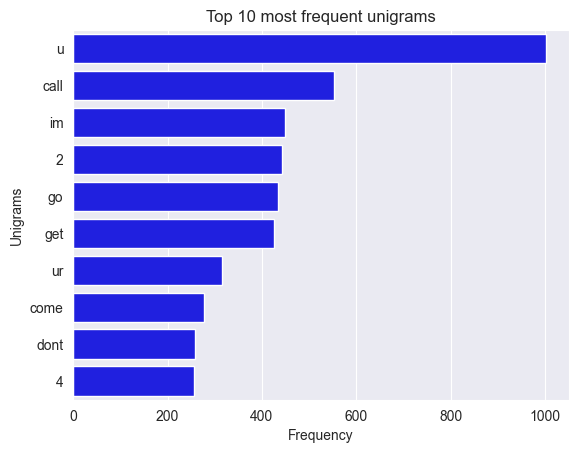

In [393]:
sns.set_style("darkgrid")
sns.barplot(x=[x[1] for x in top_unigrams], y=[x[0] for x in top_unigrams], color= "blue")
plt.title("Top 10 most frequent unigrams")
plt.xlabel("Frequency")
plt.ylabel("Unigrams")
plt.show()

#### Bigrams Plot

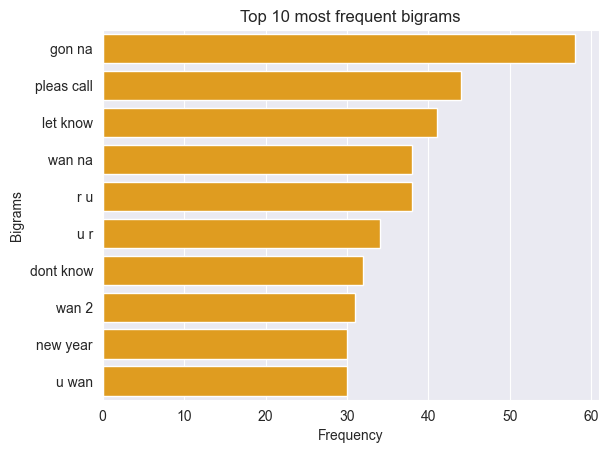

In [394]:
sns.set_style("darkgrid")
sns.barplot(x=[x[1] for x in top_bigrams], y=[" ".join(x[0]) for x in top_bigrams], color="orange")
plt.title("Top 10 most frequent bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.show()

#### Trigrams Plot

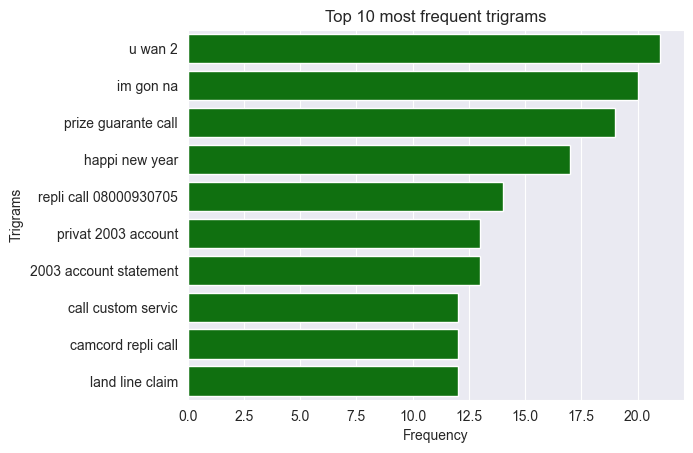

In [395]:
sns.set_style("darkgrid")
sns.barplot(x=[x[1] for x in top_trigrams], y=[" ".join(x[0]) for x in top_trigrams], color="green")
plt.title("Top 10 most frequent trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.show()

## Train Test Split 

#### Encoding the Target colum 'labels'

In [396]:
# creating an encoding function
def encoding(x):
    if x == 'spam':
        return 0
    return 1

In [397]:
# deploying the encoding function on the target column
actual_score=df['labels']
spamham=actual_score.map(encoding)
df['labels']=spamham
df.head(5)

,labels,messages
0,1,go jurong point crazi avail bugi n great world...
1,1,ok lar joke wif u oni
2,0,free entri 2 wkli comp win fa cup final tkt 21...
3,1,u dun say earli hor u c alreadi say
4,1,nah dont think goe usf live around though


In [398]:
final = df
final 

,labels,messages
0,1,go jurong point crazi avail bugi n great world...
1,1,ok lar joke wif u oni
2,0,free entri 2 wkli comp win fa cup final tkt 21...
3,1,u dun say earli hor u c alreadi say
4,1,nah dont think goe usf live around though
...,...,...
5567,0,2nd time tri 2 contact u u å750 pound prize 2 ...
5568,1,ì_ b go esplanad fr home
5569,1,piti mood soani suggest
5570,1,guy bitch act like id interest buy someth els ...


#### Preparing the columns for split, train & test

In [399]:
# displaying the length of each column
x = df['messages']
y = df['labels']

print(len(x), len(y))

5169 5169


#### train split and test for Countervectorizer

In [400]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

3876 3876
1293 1293


#### Load CountVectorizer model

In [401]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

#### Applying the model on xtrain & xtest

In [402]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [403]:
# converting vect_tunned to a CounterVectorizer class 
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

#### Displaying model's infos

In [404]:
print("Stop words:", vect_tunned.get_stop_words())
print("N-gram range:", vect_tunned.ngram_range)
print("Minimum document frequency:", vect_tunned.min_df)
print("Maximum document frequency:", vect_tunned.max_df)
print("Maximum features:", vect_tunned.max_features)

Stop words: frozenset({'will', 'i', 'since', 'cant', 'his', 'them', 'serious', 'whereas', 'get', 'a', 'show', 'both', 'your', 'becoming', 'out', 'due', 'towards', 'hers', 'become', 'see', 'de', 'those', 'on', 'whence', 'ever', 'mine', 'would', 'alone', 'when', 'yourself', 'empty', 'can', 'con', 'yet', 'forty', 'who', 'hasnt', 'several', 'seems', 'off', 'an', 'ourselves', 'please', 'throughout', 'together', 'keep', 'fill', 'then', 'between', 'whereafter', 'anyhow', 'thru', 'hereafter', 'down', 'whether', 'found', 'should', 'toward', 'he', 'again', 'yours', 'behind', 'they', 'although', 'third', 'for', 'this', 'very', 'were', 'name', 'few', 'after', 'around', 'ie', 'sincere', 'rather', 'whereupon', 'etc', 'how', 'any', 'through', 'formerly', 'nor', 'same', 'fifteen', 'until', 'another', 'anything', 'eg', 'find', 'every', 'all', 'thereby', 'nowhere', 'whither', 'whom', 'without', 'other', 'ours', 'is', 'sixty', 'hence', 'from', 'into', 'per', 'inc', 'everyone', 'have', 'cry', 'and', 'beco

### TF-IDF as an improvement

In [405]:
from sklearn.model_selection import train_test_split

#### Splitting the data into train & test

In [406]:
Train_data, test_data, y_Train, y_test = train_test_split(df['messages'],\
                                                          df['labels'], test_size=0.20, random_state=42)

#### Initiate the TFIDF model

In [407]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector=TfidfVectorizer()

#### Applying the model on the train data & test data

In [408]:
tfidf_vector.fit(Train_data)
train_tfidf=tfidf_vector.transform(Train_data)
cv_tfidf=tfidf_vector.transform(test_data)
test_tfidf=tfidf_vector.transform(test_data)

In [409]:
test_tfidf.shape

(1034, 7034)

### Normalizing Data

In [410]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
normalizer.fit(train_tfidf)
train_tfidf=normalizer.transform(train_tfidf)
cv_tfidf=normalizer.transform(cv_tfidf)
test_tfidf=normalizer.transform(test_tfidf)
if i want to implement a KNN algorithm to evaluate these lines of code what should i write 

SyntaxError: invalid syntax (2945441123.py, line 7)

### KNN ML Algorithm

In [ ]:
from time import time 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

#### Training and Evaluating KNN model using AUC 

In [ ]:
start = time()
AUC_training=[]
AUC_cv=[]
k=[i for i in range(1,30,2)]
for i in k:
    clf=KNeighborsClassifier(n_neighbors=i,algorithm='brute' )
    clf.fit(train_tfidf,y_Train)
    print("====== k1 = ",i," ===========")
    y_predict_training=clf.predict_proba(train_tfidf)[:,1]
    auc=roc_auc_score(y_Train,y_predict_training)
    AUC_training.append(auc)
    print("Train AUC = ",auc)
    y_predict_cv=clf.predict_proba(cv_tfidf)[:,1]
    auc=roc_auc_score(y_test,y_predict_cv)
    AUC_cv.append(auc)
    print(" CV AUC = ",auc)
print("Time Taken= ",int((time()-start)/60),"Minutes")

====== k1 =  1  ===========
Train AUC =  1.0
 CV AUC =  0.7787479151312983
====== k1 =  3  ===========
Train AUC =  1.0
 CV AUC =  0.7789534928823553
====== k1 =  5  ===========
Train AUC =  0.9999308011436535
 CV AUC =  0.7789534928823553
====== k1 =  7  ===========
Train AUC =  0.9999308011436535
 CV AUC =  0.8927465963306311
====== k1 =  9  ===========
Train AUC =  0.9988464143594954
 CV AUC =  0.9206857763469222
====== k1 =  11  ===========
Train AUC =  0.9969715324046032
 CV AUC =  0.9397889918932547
====== k1 =  13  ===========
Train AUC =  0.9952212083911346
 CV AUC =  0.9552499903029362
====== k1 =  15  ===========
Train AUC =  0.9933582666310632
 CV AUC =  0.9561731507699468
====== k1 =  17  ===========
Train AUC =  0.9910209734949385
 CV AUC =  0.958841782708196
====== k1 =  19  ===========
Train AUC =  0.9893851668045216
 CV AUC =  0.9612738062914549
====== k1 =  21  ===========
Train AUC =  0.9871672756166026
 CV AUC =  0.961273806291455
====== k1 =  23  ===========
Train A

#### Plot the results 

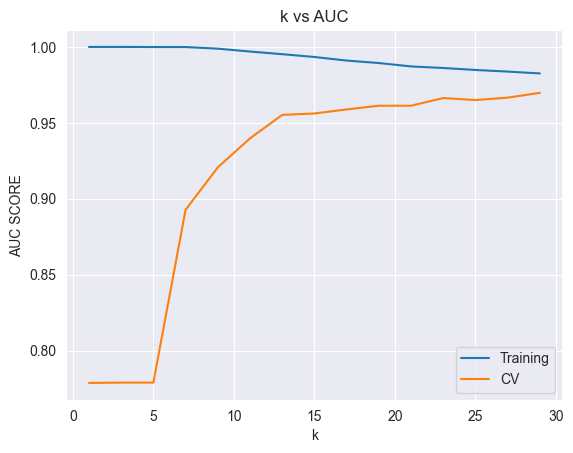

In [ ]:
plt.plot(k,AUC_training,label='Training')
plt.plot(k,AUC_cv,label='CV')
plt.ylabel('AUC SCORE')
plt.xlabel('k')
plt.title('k vs AUC')
plt.legend()
plt.show()

## Method 2 : Using TF-IDF & some Machine learning Algorithms

In this method we will do the target values encoding,  use only TF-IDF , converting the values retrived from TF-IDF to array and then applying some machine learning models to train and evaluate  

#### Vectorizing the 'messages' column using TF-IDF

In [411]:
df['messages']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å750 pound prize 2 ...
5568                             ì_ b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: messages, Length: 5169, dtype: object

In [412]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

#### Converting it to array 

In [413]:
x=tfidf.fit_transform(df['messages']).toarray()

In [414]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [415]:
x.shape

(5169, 8065)

In [416]:
df['labels']

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: labels, Length: 5169, dtype: int64

In [418]:
y=df['labels'].values

In [419]:
y 

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [420]:
y.shape

(5169,)

#### Begin with splitting, training and testing 

In [422]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### printing the shapes of the x_train, x_test, y_train, and y_test arrays

In [423]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (4135, 8065)
x_test - >   (1034, 8065)
y_train - >   (4135,)
y_test - >   (1034,)


### Training and Evaluating with Machine learning Algorithms 

#### Logistic Regression

In [424]:
# Loading the model from the library
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()

In [425]:
# Training the model
model_lr.fit(x_train,y_train)


LogisticRegression()

In [426]:
# testing
y_pred_lr=model_lr.predict(x_test)
y_pred_lr

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [427]:
y_test


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### Plotting the results 

In [428]:
from sklearn.metrics import accuracy_score,precision_score

In [439]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_lr))
print("precision score :- ",precision_score(y_test,y_pred_lr))

accuracy score :-  0.9458413926499033
precision score :-  0.9454545454545454


In [434]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [435]:
cm = confusion_matrix(y_test, y_pred_lr)

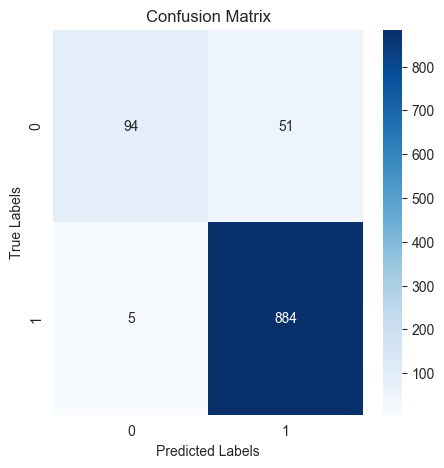

In [438]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

accuracy score :-  0.9458413926499033
precision score :-  0.9454545454545454


In [431]:
from sklearn.naive_bayes import BernoulliNB
model_bnb=BernoulliNB()
model_bnb.fit(x_train,y_train)

BernoulliNB()

In [432]:
y_pred_bnb=model_bnb.predict(x_test)
y_pred_bnb

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [433]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_bnb))
print("precision score :- ",precision_score(y_test,y_pred_bnb))

accuracy score :-  0.9690522243713733
precision score :-  0.9683060109289617
